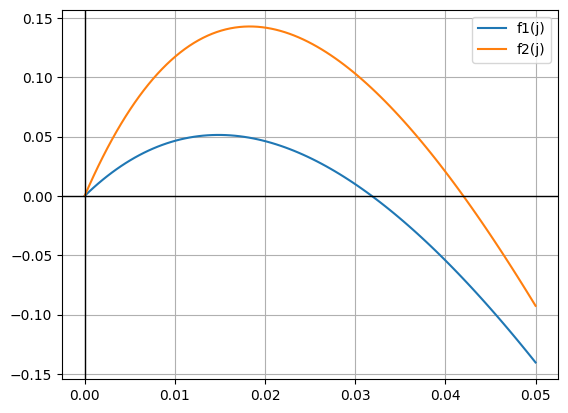

0.0318
0.0420
14 9 3 4


In [61]:
import numpy as np
import matplotlib.pyplot as plt

def f1(j):
  return 1 - ((1 + j)**-24) - ((31000.00/1867.00) * j)

def df1(j):
  return 24/((1+j)**25) - (31000.00/1867.00)

def f2(j):
  return 1 - ((1 + j)**-36) - ((31000.00/1685.00) * j)

jg = np.linspace(0, 0.05, 100)
y1 = f1(jg)
y2 = f2(jg)

plt.plot(jg, y1, label="f1(j)")
plt.plot(jg, y2, label="f2(j)")
plt.legend()
plt.grid()
plt.axhline(linewidth=1, color='black')
plt.axvline(linewidth=1, color='black')
plt.show()

# Secante para f1(j)

i = 0
erro = 10**-4

def secantef1(x0, x1, erro, i):
  er = 1
  xa1 = x0
  x = x1
  while(er >= erro):
    xa2 = xa1
    xa1 = x
    x = xa1 - f1(xa1)*(xa2 - xa1) / (f1(xa2) - f1(xa1))
    er = np.abs((x - xa1) / x)
    i += 1
  return(x, er, i)

x0 = 0.02
x1 = 0.03

raizsecf1 = secantef1(x0, x1, erro, i)

print(f'{raizsecf1[0]:.4f}')

# Secante para f2(j)

def secantef2(x0, x1, erro):
  er = 1
  xa1 = x0
  x = x1
  while(er >= erro):
    xa2 = xa1
    xa1 = x
    x = xa1 - f2(xa1)*(xa2 - xa1) / (f2(xa2) - f2(xa1))
    er = np.abs((x - xa1) / x)
  return(x, er)

x0 = 0.04
x1 = 0.05

raizsecf2 = secantef2(x0, x1, erro)

print(f'{raizsecf2[0]:.4f}')


# Newton para f1(j)

def newton(x0, erro, i):
  er = 1
  x = x0
  while(er >= erro):
    xold = x
    x = xold - f1(xold)/df1(xold)
    er = np.abs((x - xold) / x)
    i += 1
  return(x, er, i)

x0 = 0.03

raiznewf1 = newton(x0, erro, i)

# Bissecção para f1(j)

def bisseccao(a, b, erro, i):
  x = a
  er = 1
  while(er >= erro):
    xold = x
    x = (a+b)/2
    er = np.abs((x - xold)/x)
    if (f1(a) * f1(x) < 0):
      b = x
    else:
      a = x
    i += 1
  return (x, er, i)

a = 0.02
b = 0.06

raizbisf1 = bisseccao(a, b, erro, i)

# Falsa posição para f1(j)

def falsaposicao(a, b, erro, i):
  x = a
  er = 1
  while(er >= erro):
    xold = x
    x = a - f1(a) * (b-a) / (f1(b) - f1(a))
    er = np.abs((x - xold)/x)
    if (f1(a) * f1(x) < 0):
      b = x
    else:
      a = x
    i += 1
  return (x, er, i)

raizfpf1 = falsaposicao(a, b, erro , i)

print(raizbisf1[2], raizfpf1[2], raiznewf1[2], raizsecf1[2])